* Data Analysis Phase
*  MAin aim is to understand more about the data

In [1]:
# Importing essential libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

##### Loading the dataset[train and test]

In [2]:
file_train=r'D:\Machine Learning\Python Projects\Project-3\counterfeit_train.csv'
file_test=r'D:\Machine Learning\Python Projects\Project-3\counterfeit_test.csv'

cf_train=pd.read_csv(file_train)
cf_test=pd.read_csv(file_test)

print('shape of train data: {}'.format(cf_train.shape))
print('shape of test data: {}'.format(cf_test.shape))

shape of train data: (6818, 12)
shape of test data: (1705, 11)


In [3]:
cf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   5652 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [4]:
cf_train.isnull().sum()

Medicine_ID               0
Counterfeit_Weight     1166
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales         0
dtype: int64

In [5]:
cf_test.isnull().sum()

Medicine_ID              0
Counterfeit_Weight     297
DistArea_ID              0
Active_Since             0
Medicine_MRP             0
Medicine_Type            0
SidEffect_Level          0
Availability_rating      0
Area_Type                0
Area_City_Type           0
Area_dist_level          0
dtype: int64

In [6]:
cf_train['Counterfeit_Weight'].mean()

14.115056617126996

In [7]:
cf_train['Counterfeit_Weight'].median()

13.8

## Exploring the dataset

In [8]:
# Returns top 5 rows from the dataset
cf_train.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [9]:
# Returns basic information on all columns
cf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   5652 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [10]:
# Returns different statistics of Numerical columns[int and float] only
cf_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Counterfeit_Weight,5652.0,14.115057,4.649668,5.855,9.995000,13.800000,18.050000,22.650000
Active_Since,6818.0,1995.836316,8.368979,1983.000,1985.000000,1997.000000,2002.000000,2007.000000
Medicine_MRP,6818.0,151.401518,62.203961,41.790,104.509400,153.195700,196.148350,277.188400
Availability_rating,6818.0,0.079174,0.051481,0.013,0.040058,0.066955,0.107697,0.341391
Counterfeit_Sales,6818.0,2280.583480,1693.354404,146.290,933.265600,1902.670400,3207.638400,13199.964800


In [11]:
# checking count of null values in each column
cf_train.isnull().sum()

Medicine_ID               0
Counterfeit_Weight     1166
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales         0
dtype: int64

In [12]:
list(zip(cf_train.columns,cf_train.dtypes,cf_train.nunique()))

[('Medicine_ID', dtype('O'), 1557),
 ('Counterfeit_Weight', dtype('float64'), 414),
 ('DistArea_ID', dtype('O'), 10),
 ('Active_Since', dtype('int64'), 9),
 ('Medicine_MRP', dtype('float64'), 5097),
 ('Medicine_Type', dtype('O'), 16),
 ('SidEffect_Level', dtype('O'), 2),
 ('Availability_rating', dtype('float64'), 6317),
 ('Area_Type', dtype('O'), 4),
 ('Area_City_Type', dtype('O'), 3),
 ('Area_dist_level', dtype('O'), 4),
 ('Counterfeit_Sales', dtype('float64'), 3142)]

In [13]:
# ['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
#        'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
#        'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
#        'Counterfeit_Sales']

In [14]:
# Here we will check the percentage of nan values present in each feature
# step-1: make the list of features which has missing values

features_with_nan=[feature for feature in cf_train.columns if cf_train[feature].isnull().sum()>1]

# step-2: print the feature name and the percentage of missing values

for feature in features_with_nan:
     print('{}: {}% Missing values'.format(feature,np.round(cf_train[feature].isnull().mean(),4)))

Counterfeit_Weight: 0.171% Missing values


### Since they are many missing values, we need to find the relationship between missing values and 'Counterfeit_Sales'

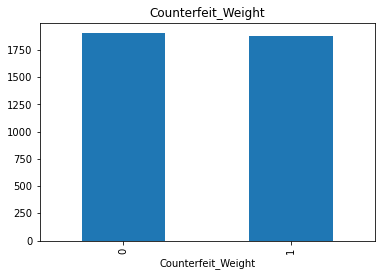

In [15]:
# Let's plot some diagram for this relationship

for feature in features_with_nan:
    cf =cf_train.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    cf[feature]=np.where(cf[feature].isnull(),1,0)
    
    # let's calculate the mean 'Counterfeit_Sales' where the information is missing or present
    cf.groupby(feature)['Counterfeit_Sales'].median().plot.bar()
    plt.title(feature)
    plt.show()


Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

In [16]:
# Numerical features
numerical_features=[feature for feature in cf_train.columns if cf_train[feature].dtypes != 'O']

print('number of Numerical featues: {}'.format(len(numerical_features)))

# visualise the numerical variables
cf_train[numerical_features].head()

number of Numerical featues: 5


,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
0,13.100,1995,160.2366,0.070422,1775.5026
1,NaN,1983,110.4384,0.013000,3069.1520
2,9.025,1995,259.4092,0.060783,2603.0920
3,11.800,1995,99.9830,0.065555,1101.7130
4,NaN,1983,56.4402,0.248859,158.9402


##### Temporal Variables(Eg: Datetime Variables)

From the Dataset we have 1 year variable. We have extract information from the datetime variables
like no of years or no of days. 

In [17]:
# Active_Since
cf_train['Active_Since'].value_counts()

1983    1166
2005     760
1995     749
1985     749
2002     748
1997     739
2000     736
2007     729
1996     442
Name: Active_Since, dtype: int64

In [18]:
print('Active_Since: {}, unique values: {}'.format(cf_train['Active_Since'].unique(),
                                                   len(cf_train['Active_Since'].unique())))

Active_Since: [1995 1983 2000 2007 1985 2005 1996 2002 1997], unique values: 9


Text(0.5, 1.0, 'Active_Since VS Counterfeit_Sales')

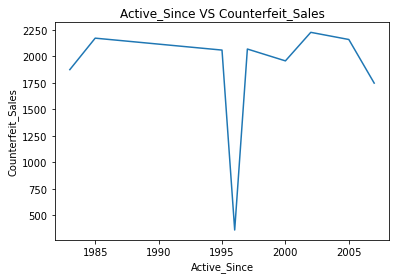

In [19]:
# Lets analyze the Temporal Datetime Variables
# We will check whether there is a relation between year the house is sold and the sales price

cf_train.groupby('Active_Since')['Counterfeit_Sales'].median().plot()
plt.xlabel('Active_Since')
plt.ylabel('Counterfeit_Sales')
plt.title('Active_Since VS Counterfeit_Sales')

In [20]:
# Numerical variables are usually of 2 type
# 1. Continous variable and Discrete Variables

discrete_features=[feature for feature in numerical_features if len(cf_train[feature].unique())<25]
print(discrete_features)
print('number of Discrete features: {}'.format(len(discrete_features)))
cf_train[discrete_features].head()

['Active_Since']
number of Discrete features: 1


,Active_Since
0,1995
1,1983
2,1995
3,1995
4,1983


Text(0.5, 1.0, 'Actve_Since VS Counterfeit_Sales')

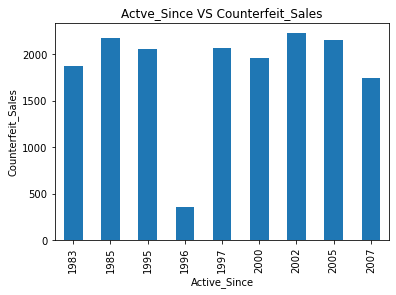

In [21]:
# Lets Find the realtionship between them and Sale PRice
cf_train.groupby('Active_Since')['Counterfeit_Sales'].median().plot.bar()
plt.xlabel('Active_Since')
plt.ylabel('Counterfeit_Sales')
plt.title('Actve_Since VS Counterfeit_Sales')

In [22]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
print(continuous_features)
print('number of Continuous features: {}'.format(len(continuous_features)))
cf_train[continuous_features].head()

['Counterfeit_Weight', 'Medicine_MRP', 'Availability_rating', 'Counterfeit_Sales']
number of Continuous features: 4


,Counterfeit_Weight,Medicine_MRP,Availability_rating,Counterfeit_Sales
0,13.100,160.2366,0.070422,1775.5026
1,NaN,110.4384,0.013000,3069.1520
2,9.025,259.4092,0.060783,2603.0920
3,11.800,99.9830,0.065555,1101.7130
4,NaN,56.4402,0.248859,158.9402


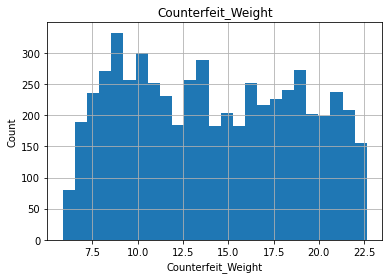

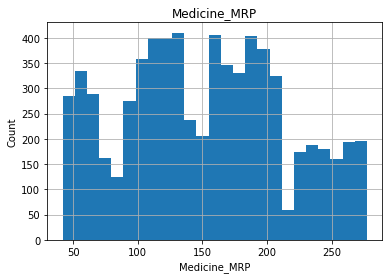

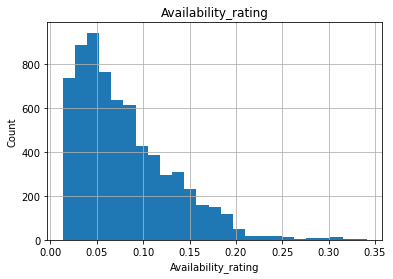

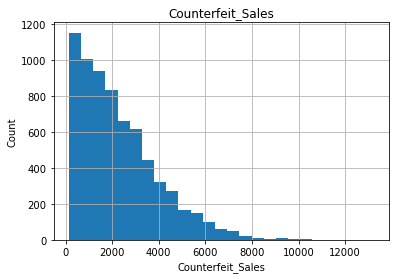

In [23]:
# Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continuous_features:
    cf=cf_train.copy()
    
    cf[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

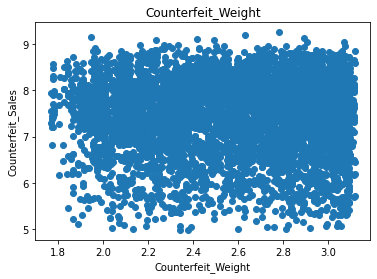

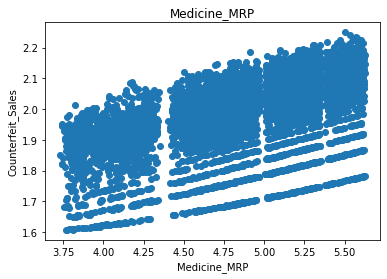

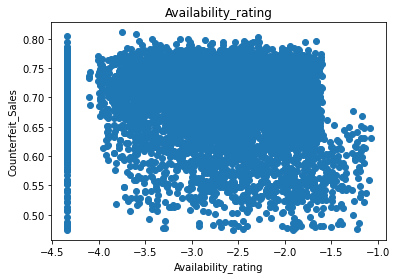

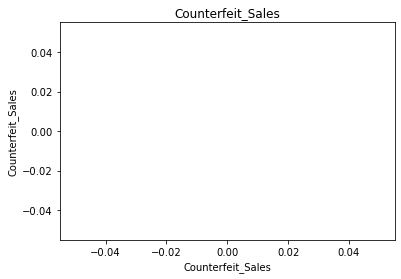

In [24]:
# We will be using logarithmic transformation

for feature in continuous_features:
    cf=cf.copy()
    
    if 0 in cf[feature].unique():
        pass
    else:
        cf[feature]=np.log(cf[feature])
        cf['Counterfeit_Sales']=np.log(cf['Counterfeit_Sales'])
        plt.scatter(x=cf[feature],y=cf['Counterfeit_Sales'])
        plt.xlabel(feature)
        plt.ylabel('Counterfeit_Sales')
        plt.title(feature)
        plt.show()

#### Outliers

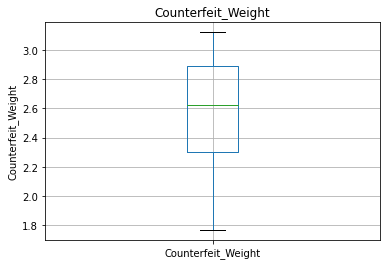

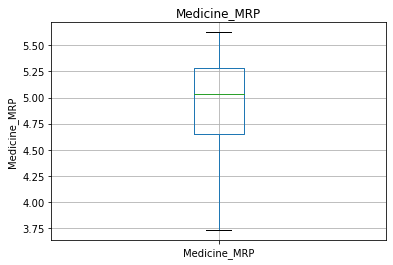

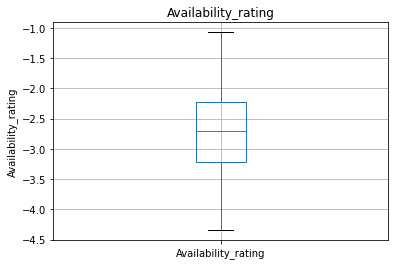

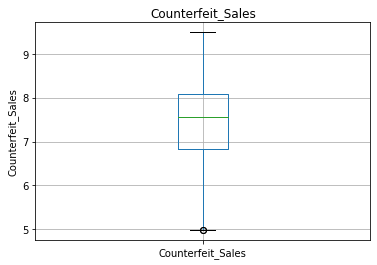

In [25]:
for feature in continuous_features:
    cf=cf_train.copy()
    
    if 0 in cf[feature].unique():
        pass
    else:
        cf[feature]=np.log(cf[feature])
        cf.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [26]:
def outlier_count(feature):
    
    q25=np.percentile(feature,25)
    q50=np.median(feature)
    q75=np.percentile(feature,75)
    
    iqr=q75-q25
    
    lower_limit=(q25-1.5-iqr)
    upper_limit=(q75+1.5*iqr)
    
    lower_count=sum(feature<lower_limit)
    upper_count=sum(feature>upper_limit)
    
    return('q25: {}, q50 :{},q75: {}, iqr: {}, lower_count: {}, upper_count: {}'.format(
        q25,q50,q75,iqr,lower_count,upper_count))

In [27]:
outlier_count(cf_train['Counterfeit_Sales'])

'q25: 933.2656, q50 :1902.6704,q75: 3207.6384, iqr: 2274.3728, lower_count: 0, upper_count: 139'

In [28]:
# Categorical features
categorical_features=[feature for feature in cf_train.columns if cf_train[feature].dtypes == 'O']

print('number of Categorical features: {}'.format(len(categorical_features)))

# visualise the numerical variables
cf_train[categorical_features].head()

number of Categorical features: 7


,Medicine_ID,DistArea_ID,Medicine_Type,SidEffect_Level,Area_Type,Area_City_Type,Area_dist_level
0,RRA15,Area046,Antimalarial,critical,DownTown,Tier 1,Small
1,YVV26,Area027,Mstablizers,mild,CityLimits,Tier 3,Medium
2,LJC15,Area046,Cardiac,mild,DownTown,Tier 1,Small
3,GWC40,Area046,OralContraceptives,mild,DownTown,Tier 1,Small
4,QMN13,Area019,Hreplacements,critical,MidTownResidential,Tier 1,Small


'Medicine_ID' is unque indentifier.
From the above dataset some of the features like 'Medicine_ID' is not required, Drop this feature

In [29]:
for feature in categorical_features:
    #if feature not in ['Medicine_ID']:
        print({'The feature is: {}, number of categorires are: {}'.format(feature,len(cf_train[feature].unique()))})

{'The feature is: Medicine_ID, number of categorires are: 1557'}
{'The feature is: DistArea_ID, number of categorires are: 10'}
{'The feature is: Medicine_Type, number of categorires are: 16'}
{'The feature is: SidEffect_Level, number of categorires are: 2'}
{'The feature is: Area_Type, number of categorires are: 4'}
{'The feature is: Area_City_Type, number of categorires are: 3'}
{'The feature is: Area_dist_level, number of categorires are: 4'}


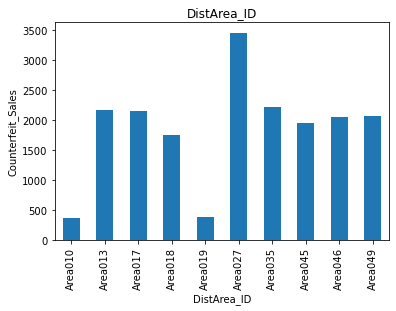

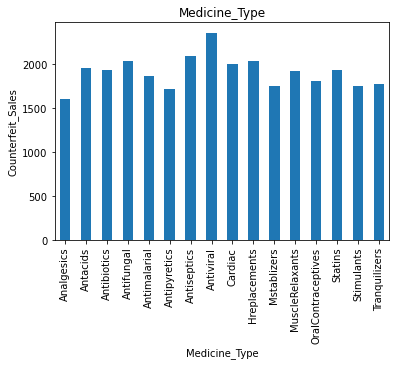

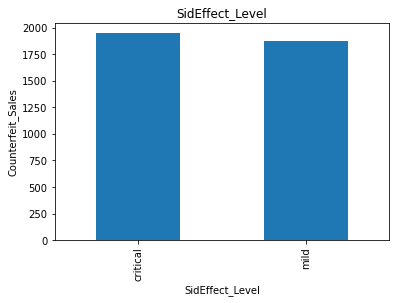

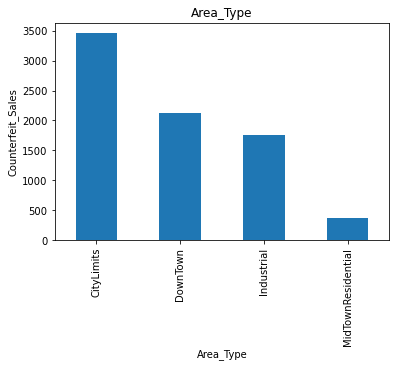

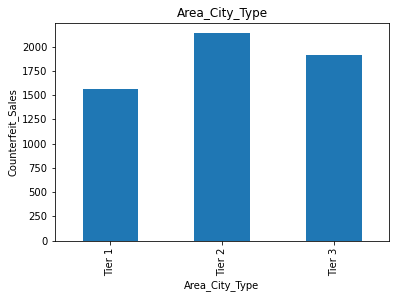

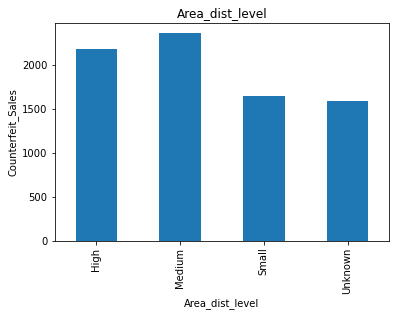

In [30]:
# Find out the relationship between categorical variable and dependent feature SalesPrice

for feature in categorical_features:
    cf=cf_train.copy()
    if feature not in ['Medicine_ID']:
        
    
        cf.groupby(feature)['Counterfeit_Sales'].median().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('Counterfeit_Sales')
        plt.title(feature)
        plt.show()

In [31]:
cf_train.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales'],
      dtype='object')

In [32]:
# 'Medicine_ID'
cf_train['Medicine_ID'].value_counts()

OQH15    9
KIS14    9
QLK14    9
RQS74    9
HQH91    9
        ..
BIY14    1
WET13    1
ETU15    1
RLS13    1
KQB14    1
Name: Medicine_ID, Length: 1557, dtype: int64

In [33]:
# 'Counterfeit_Weight'
cf_train['Counterfeit_Weight'].value_counts()

13.450    72
18.900    67
13.100    65
18.000    55
14.950    55
          ..
6.510      1
7.395      1
6.700      1
8.195      1
8.060      1
Name: Counterfeit_Weight, Length: 414, dtype: int64

In [34]:
# 'DistArea_ID'
cf_train['DistArea_ID'].value_counts()

Area017    760
Area046    749
Area013    749
Area035    748
Area049    739
Area045    736
Area027    735
Area018    729
Area010    442
Area019    431
Name: DistArea_ID, dtype: int64

In [35]:
# 'Medicine_Type'
cf_train['Medicine_Type'].value_counts()

Hreplacements         976
Antibiotics           970
Antiseptics           724
OralContraceptives    694
Antipyretics          536
Cardiac               522
Mstablizers           514
Tranquilizers         420
Analgesics            356
Antimalarial          339
Antacids              206
Statins               167
MuscleRelaxants       139
Antifungal            111
Stimulants             95
Antiviral              49
Name: Medicine_Type, dtype: int64

In [36]:
# 'SidEffect_Level'
cf_train['SidEffect_Level'].value_counts()

mild        4434
critical    2384
Name: SidEffect_Level, dtype: int64

In [37]:
# 'Area_Type'
cf_train['Area_Type'].value_counts()

DownTown              4481
MidTownResidential     873
CityLimits             735
Industrial             729
Name: Area_Type, dtype: int64

In [38]:
# 'Area_City_Type'
cf_train['Area_City_Type'].value_counts()

Tier 3    2655
Tier 2    2244
Tier 1    1919
Name: Area_City_Type, dtype: int64

In [39]:
# 'Area_dist_level'
cf_train['Area_dist_level'].value_counts()

Medium     2203
Unknown    1938
Small      1928
High        749
Name: Area_dist_level, dtype: int64

In [40]:
cf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   5652 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [41]:
# 'Medicine_ID'---> Drop this column
# 'Counterfeit_Weight'---> Replace missing values with median
# 'DistArea_ID' ---> create dummies
# 'Active_Since'--> let it be
# 'Medicine_MRP'---> let it be
# 'Medicine_Type'---> create dummies
# 'SidEffect_Level' --->create dummies
# 'Availability_rating'--->let it be
# 'Area_Type'--->create dummies
# 'Area_City_Type'---> create dummies
# 'Area_dist_level'---> create dummies
# 'Counterfeit_Sales'--let it be